In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
class Multi_Variate_Polynomial_Regression:
    
    
    def __init__(self, X, y, random_seed = 42, degree_of_polynomial = 2):
        
        poly_features = [np.ones((X.shape[0], 1))]
        for i in range(1, degree_of_polynomial + 1):
            poly_features.append(X**i)
            
        poly_features = tuple(poly_features)
        self.X = np.hstack(poly_features)
        self.y = y.reshape(-1, 1)
        
        self._m_records = self.X.shape[0]
        self._n_features = self.X.shape[1]
        
        np.random.seed(random_seed)
        self._weights = np.random.randn(1, self._n_features)
        self._costs = []
        
        self._y_mean = np.mean(self.y, axis = 0)[0]
        
    def mean_absolute_error(self, y_true, y_pred):
        return np.sum(np.abs(y_true - y_pred)) / len(y_true)
    
    def fit(self, learning_rate = 0.0000001, epochs = 60000):
        for epoch in range(1 , epochs+1):
            Hypothesis = np.dot(self._weights, self.X.T)
            error = (Hypothesis - y)
            if epoch % 1000 == 0:
                cost = np.sum(error**2) / 2
                self._costs.append(cost)
                mae = self.mean_absolute_error(y, Hypothesis)
                print('Epoch {}\t: MAE_Error is {}\t| Costs\t:{}'.format(epoch, mae, cost))
                
            updater = learning_rate * error
            self._weights = self._weights - np.dot(updater, self.X)
#             print(self._weights.shape)
        
        self.intercept = self._weights[0][0]
        self.coefficient = self._weights[0][1:]
    
        return self.intercept, self.coefficient
    
    def plot_cost_function(self):
        x_axis = list(range(1, len(self._costs)+1))
        y_axis = self._costs
        
        plt.figure(figsize = (7, 10))
        plt.plot(x_axis, y_axis)
        plt.title('Cost Function Plot')
        plt.xlabel('Epochs in Thousands', fontsize = 20)
        plt.ylabel('Costs', fontsize = 20)
        plt.show()
        
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
#         print(self._weights.shape, self.X.T.shape)
        _y_pred = np.dot(self._weights, self.X.T)
#         print(self.y.shape, _y_pred.shape)
#         print(_y_pred)
#         print(self.y - _y_pred.T)
        line_1_sum = np.sum((self.y - _y_pred.T) ** 2)
        line_2_sum = np.sum((self.y - self._y_mean) ** 2)
#         print(line_1_sum, line_2_sum)
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        print("R2 Score = {}".format(r2_score))
        return r2_score

In [44]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

In [45]:
df = pd.DataFrame({'X' : x, 'y' : y})
df.head()

,X,y
0,-3.292157,-53.468412
1,0.799528,-1.262560
2,-0.936214,-3.506193
3,-4.722680,-107.223200
4,-3.602674,-49.131950


In [46]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

In [47]:
pol = Multi_Variate_Linear_Regression(X, y)

In [28]:
pol.fit(learning_rate = 0.0000004, epochs = 1000000)

Epoch 1000	: MAE_Error is 16.115623005946457	| Costs	:8931.611349795367
Epoch 2000	: MAE_Error is 15.758118456339485	| Costs	:8546.978228043161
Epoch 3000	: MAE_Error is 15.414581915401405	| Costs	:8196.900494739823
Epoch 4000	: MAE_Error is 15.084329175115164	| Costs	:7877.975111322949
Epoch 5000	: MAE_Error is 14.85501667884166	| Costs	:7587.139384239959
Epoch 6000	: MAE_Error is 14.729533939812828	| Costs	:7321.636843354064
Epoch 7000	: MAE_Error is 14.696047867460754	| Costs	:7078.986542542146
Epoch 8000	: MAE_Error is 14.658598316151355	| Costs	:6856.955439238889
Epoch 9000	: MAE_Error is 14.617433937156628	| Costs	:6653.533544109175
Epoch 10000	: MAE_Error is 14.572790232100322	| Costs	:6466.91156300563
Epoch 11000	: MAE_Error is 14.558273719397647	| Costs	:6295.46078123604
Epoch 12000	: MAE_Error is 14.539785838216241	| Costs	:6137.7149652380185
Epoch 13000	: MAE_Error is 14.517364384079988	| Costs	:5992.354079316401
Epoch 14000	: MAE_Error is 14.491250175663467	| Costs	:5858.18

Epoch 114000	: MAE_Error is 12.158204158116748	| Costs	:3043.1286852383487
Epoch 115000	: MAE_Error is 12.149856029088419	| Costs	:3035.11626553256
Epoch 116000	: MAE_Error is 12.141541993099073	| Costs	:3027.229291303365
Epoch 117000	: MAE_Error is 12.133263399864763	| Costs	:3019.4657828226063
Epoch 118000	: MAE_Error is 12.125021505260776	| Costs	:3011.8237931783883
Epoch 119000	: MAE_Error is 12.11681747634336	| Costs	:3004.3014075748383
Epoch 120000	: MAE_Error is 12.108652396111362	| Costs	:2996.896742661553
Epoch 121000	: MAE_Error is 12.100527268021358	| Costs	:2989.6079458904433
Epoch 122000	: MAE_Error is 12.092443020268846	| Costs	:2982.4331948978556
Epoch 123000	: MAE_Error is 12.084400509847544	| Costs	:2975.3706969100012
Epoch 124000	: MAE_Error is 12.076400526398421	| Costs	:2968.4186881699816
Epoch 125000	: MAE_Error is 12.068443795859004	| Costs	:2961.5754333848895
Epoch 126000	: MAE_Error is 12.060530983923504	| Costs	:2954.8392251914297
Epoch 127000	: MAE_Error is 12

Epoch 228000	: MAE_Error is 11.804755581453474	| Costs	:2615.7354342108883
Epoch 229000	: MAE_Error is 11.80542112640184	| Costs	:2614.4063972605622
Epoch 230000	: MAE_Error is 11.806081393915047	| Costs	:2613.098137438549
Epoch 231000	: MAE_Error is 11.806736428219715	| Costs	:2611.8103299313134
Epoch 232000	: MAE_Error is 11.807386273050591	| Costs	:2610.5426550032194
Epoch 233000	: MAE_Error is 11.808030971661967	| Costs	:2609.2947979171377
Epoch 234000	: MAE_Error is 11.80867056683839	| Costs	:2608.0664488563043
Epoch 235000	: MAE_Error is 11.809305100905155	| Costs	:2606.857302847392
Epoch 236000	: MAE_Error is 11.809934615738188	| Costs	:2605.6670596848003
Epoch 237000	: MAE_Error is 11.810559152773664	| Costs	:2604.495423856112
Epoch 238000	: MAE_Error is 11.811178753017165	| Costs	:2603.3421044687284
Epoch 239000	: MAE_Error is 11.811793457052465	| Costs	:2602.2068151776425
Epoch 240000	: MAE_Error is 11.812403305049996	| Costs	:2601.0892741143507
Epoch 241000	: MAE_Error is 11

Epoch 343000	: MAE_Error is 11.855220745373206	| Costs	:2544.606533912218
Epoch 344000	: MAE_Error is 11.85548921096034	| Costs	:2544.389470729704
Epoch 345000	: MAE_Error is 11.855755569665046	| Costs	:2544.1758009437067
Epoch 346000	: MAE_Error is 11.856019838027315	| Costs	:2543.9654715045126
Epoch 347000	: MAE_Error is 11.85628203245703	| Costs	:2543.7584301917427
Epoch 348000	: MAE_Error is 11.85654216923498	| Costs	:2543.554625601397
Epoch 349000	: MAE_Error is 11.856800264513879	| Costs	:2543.3540071330763
Epoch 350000	: MAE_Error is 11.857056334319395	| Costs	:2543.1565249774367
Epoch 351000	: MAE_Error is 11.857310394551224	| Costs	:2542.962130103811
Epoch 352000	: MAE_Error is 11.857562460983983	| Costs	:2542.7707742480393
Epoch 353000	: MAE_Error is 11.857812549268257	| Costs	:2542.582409900487
Epoch 354000	: MAE_Error is 11.858060674931602	| Costs	:2542.396990294247
Epoch 355000	: MAE_Error is 11.858306853379487	| Costs	:2542.214469393531
Epoch 356000	: MAE_Error is 11.8585

Epoch 457000	: MAE_Error is 11.875496288123562	| Costs	:2533.02551588269
Epoch 458000	: MAE_Error is 11.875605640968832	| Costs	:2532.989501304526
Epoch 459000	: MAE_Error is 11.87571413567815	| Costs	:2532.9540497501907
Epoch 460000	: MAE_Error is 11.875821778985722	| Costs	:2532.919152417809
Epoch 461000	: MAE_Error is 11.875928577572827	| Costs	:2532.8848006431062
Epoch 462000	: MAE_Error is 11.876034538068316	| Costs	:2532.8509858972607
Epoch 463000	: MAE_Error is 11.876139667049083	| Costs	:2532.817699784782
Epoch 464000	: MAE_Error is 11.876243971040374	| Costs	:2532.7849340414264
Epoch 465000	: MAE_Error is 11.876347456516202	| Costs	:2532.752680532149
Epoch 466000	: MAE_Error is 11.876450129899792	| Costs	:2532.7209312490836
Epoch 467000	: MAE_Error is 11.876551997563986	| Costs	:2532.689678309549
Epoch 468000	: MAE_Error is 11.87665306583158	| Costs	:2532.6589139540993
Epoch 469000	: MAE_Error is 11.876753340975778	| Costs	:2532.62863054459
Epoch 470000	: MAE_Error is 11.87685

Epoch 568000	: MAE_Error is 11.883619343434658	| Costs	:2531.1225242450164
Epoch 569000	: MAE_Error is 11.883664951402285	| Costs	:2531.1162595540573
Epoch 570000	: MAE_Error is 11.883710201465917	| Costs	:2531.11009280039
Epoch 571000	: MAE_Error is 11.883755096434143	| Costs	:2531.1040224529424
Epoch 572000	: MAE_Error is 11.88379963909355	| Costs	:2531.0980470045706
Epoch 573000	: MAE_Error is 11.88384383220887	| Costs	:2531.0921649717
Epoch 574000	: MAE_Error is 11.883887678523072	| Costs	:2531.0863748939437
Epoch 575000	: MAE_Error is 11.883931180757681	| Costs	:2531.0806753337465
Epoch 576000	: MAE_Error is 11.883974341612836	| Costs	:2531.0750648760313
Epoch 577000	: MAE_Error is 11.884017163767457	| Costs	:2531.0695421278338
Epoch 578000	: MAE_Error is 11.884059649879434	| Costs	:2531.064105717976
Epoch 579000	: MAE_Error is 11.884101802585857	| Costs	:2531.0587542967105
Epoch 580000	: MAE_Error is 11.884143624503093	| Costs	:2531.0534865353925
Epoch 581000	: MAE_Error is 11.88

Epoch 680000	: MAE_Error is 11.887026261169558	| Costs	:2530.7904114875996
Epoch 681000	: MAE_Error is 11.887045133687801	| Costs	:2530.7893387884897
Epoch 682000	: MAE_Error is 11.887063858105822	| Costs	:2530.788282859121
Epoch 683000	: MAE_Error is 11.88708243558584	| Costs	:2530.7872434373285
Epoch 684000	: MAE_Error is 11.887100867280918	| Costs	:2530.786220265046
Epoch 685000	: MAE_Error is 11.88711915433509	| Costs	:2530.785213088241
Epoch 686000	: MAE_Error is 11.88713729788343	| Costs	:2530.7842216568524
Epoch 687000	: MAE_Error is 11.887155299052072	| Costs	:2530.783245724729
Epoch 688000	: MAE_Error is 11.88717315895832	| Costs	:2530.782285049568
Epoch 689000	: MAE_Error is 11.887190878710728	| Costs	:2530.7813393928523
Epoch 690000	: MAE_Error is 11.887208459409145	| Costs	:2530.780408519797
Epoch 691000	: MAE_Error is 11.88722590214476	| Costs	:2530.779492199285
Epoch 692000	: MAE_Error is 11.887243208000232	| Costs	:2530.7785902038127
Epoch 693000	: MAE_Error is 11.887260

Epoch 795000	: MAE_Error is 11.888459284240138	| Costs	:2530.733001564854
Epoch 796000	: MAE_Error is 11.888466911251815	| Costs	:2530.7328263677036
Epoch 797000	: MAE_Error is 11.888474478411275	| Costs	:2530.73265390945
Epoch 798000	: MAE_Error is 11.888481986188207	| Costs	:2530.7324841472746
Epoch 799000	: MAE_Error is 11.88848943504859	| Costs	:2530.732317039028
Epoch 800000	: MAE_Error is 11.88849682545477	| Costs	:2530.732152543222
Epoch 801000	: MAE_Error is 11.888504157865482	| Costs	:2530.7319906190146
Epoch 802000	: MAE_Error is 11.888511432735832	| Costs	:2530.7318312262046
Epoch 803000	: MAE_Error is 11.888518650517344	| Costs	:2530.7316743252168
Epoch 804000	: MAE_Error is 11.888525811658038	| Costs	:2530.7315198770966
Epoch 805000	: MAE_Error is 11.888532916602419	| Costs	:2530.731367843499
Epoch 806000	: MAE_Error is 11.888539965791422	| Costs	:2530.731218186675
Epoch 807000	: MAE_Error is 11.888546959662607	| Costs	:2530.7310708694695
Epoch 808000	: MAE_Error is 11.888

Epoch 910000	: MAE_Error is 11.889038416476275	| Costs	:2530.723625165908
Epoch 911000	: MAE_Error is 11.889041498805103	| Costs	:2530.723596552067
Epoch 912000	: MAE_Error is 11.889044556945661	| Costs	:2530.723568385554
Epoch 913000	: MAE_Error is 11.889047591087767	| Costs	:2530.7235406593736
Epoch 914000	: MAE_Error is 11.889050601419754	| Costs	:2530.723513366642
Epoch 915000	: MAE_Error is 11.889053588128457	| Costs	:2530.7234865005844
Epoch 916000	: MAE_Error is 11.889056551399246	| Costs	:2530.723460054529
Epoch 917000	: MAE_Error is 11.889059491416063	| Costs	:2530.723434021911
Epoch 918000	: MAE_Error is 11.889062408361387	| Costs	:2530.723408396267
Epoch 919000	: MAE_Error is 11.889065302416284	| Costs	:2530.723383171234
Epoch 920000	: MAE_Error is 11.889068173760347	| Costs	:2530.72335834055
Epoch 921000	: MAE_Error is 11.889071022571846	| Costs	:2530.7233338980486
Epoch 922000	: MAE_Error is 11.889073849027577	| Costs	:2530.7233098376632
Epoch 923000	: MAE_Error is 11.8890

(-16.78975085784791, array([8.29203857]))

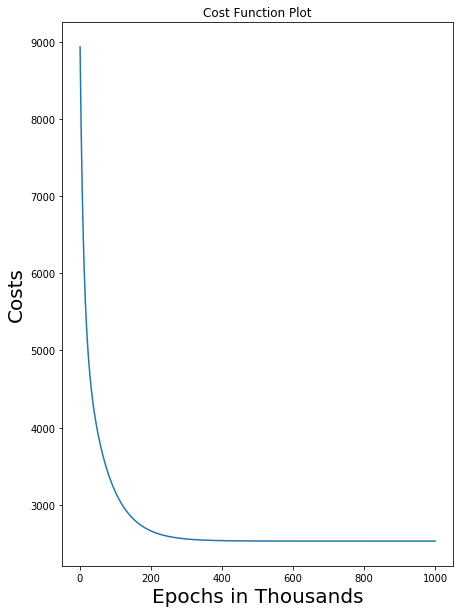

In [29]:
pol.plot_cost_function()

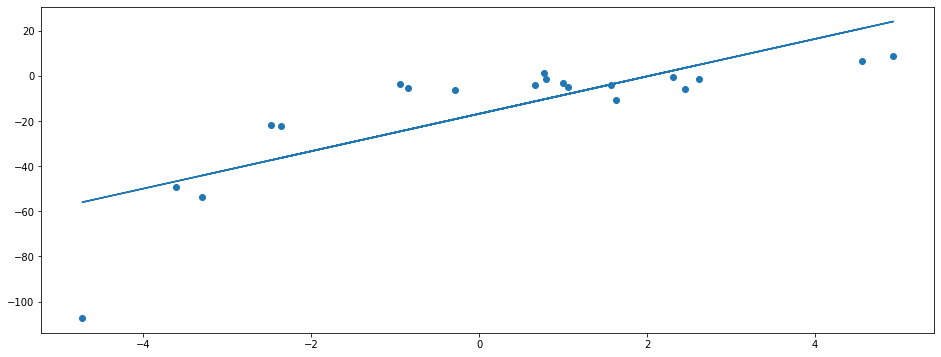

In [34]:
plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'])
plt.plot(df.iloc[:, [0]].values, np.dot(pol._weights, pol.X.T).T)

Epoch 1000	: MAE_Error is 11.889405261223422	| Costs	:2530.7218028251227
Epoch 2000	: MAE_Error is 11.889431198572694	| Costs	:2530.721794843037
Epoch 3000	: MAE_Error is 11.889431199878375	| Costs	:2530.7217948430375


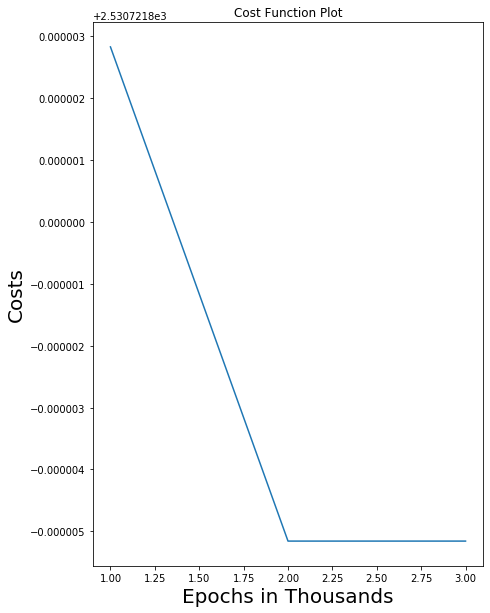

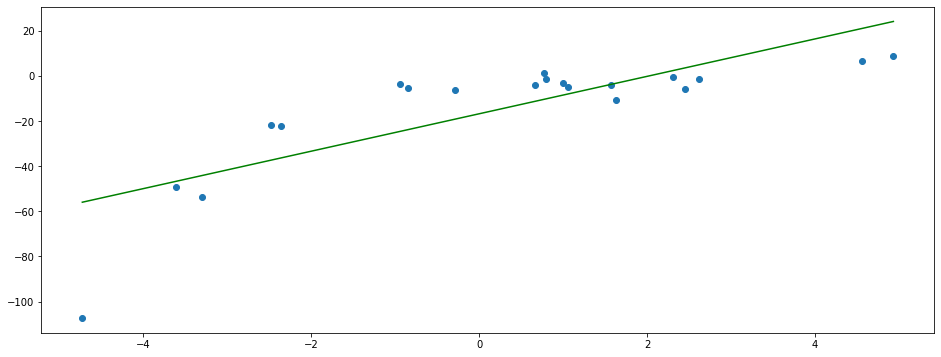

In [109]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

poly = Multi_Variate_Polynomial_Regression(X, y, degree_of_polynomial = 1)

poly.fit(learning_rate = 0.0005, epochs = 3000)

poly.plot_cost_function()

plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'])
plot_df = pd.DataFrame({'X' : X[:, 0], 'y' : np.dot(poly._weights, poly.X.T).T[:, 0]})
plot_df.sort_values(by = 'X', inplace = True, ignore_index = True)
plt.plot(plot_df['X'], plot_df['y'], 'g')

Epoch 1000	: MAE_Error is 8.339765802418993	| Costs	:1024.2356882263553
Epoch 2000	: MAE_Error is 8.336600481872104	| Costs	:1024.2325466130783
Epoch 3000	: MAE_Error is 8.33658923986083	| Costs	:1024.2325465734498


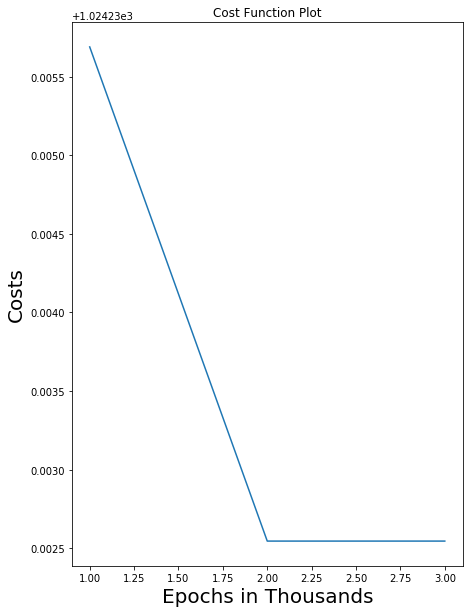

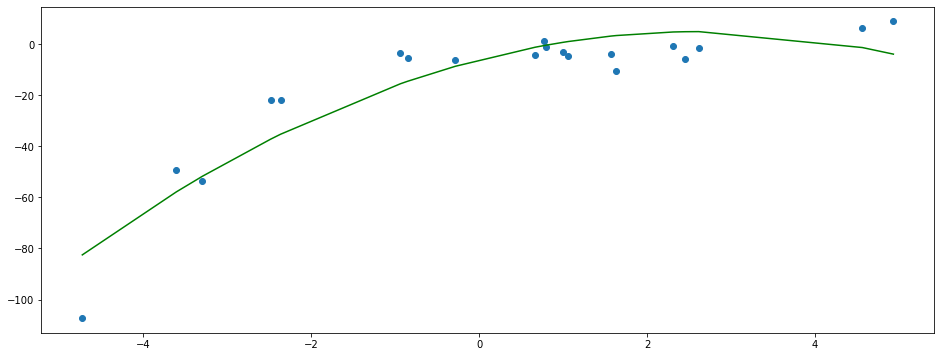

In [110]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

poly = Multi_Variate_Polynomial_Regression(X, y, degree_of_polynomial = 2)

poly.fit(learning_rate = 0.0005, epochs = 3000)

poly.plot_cost_function()

plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'])
plot_df = pd.DataFrame({'X' : X[:, 0], 'y' : np.dot(poly._weights, poly.X.T).T[:, 0]})
plot_df.sort_values(by = 'X', inplace = True, ignore_index = True)
plt.plot(plot_df['X'], plot_df['y'], 'g')

Epoch 1000	: MAE_Error is 2.7355883172214948	| Costs	:132.13075263907947
Epoch 2000	: MAE_Error is 2.669402270038989	| Costs	:123.93455790104967
Epoch 3000	: MAE_Error is 2.6490852070063493	| Costs	:120.87582678870191
Epoch 4000	: MAE_Error is 2.6539778137300374	| Costs	:119.72068602260843
Epoch 5000	: MAE_Error is 2.656602011109394	| Costs	:119.28373419767284
Epoch 6000	: MAE_Error is 2.658129007640862	| Costs	:119.11841331527464
Epoch 7000	: MAE_Error is 2.6590485567706446	| Costs	:119.05586223752695
Epoch 8000	: MAE_Error is 2.6596097198014386	| Costs	:119.03219521478569


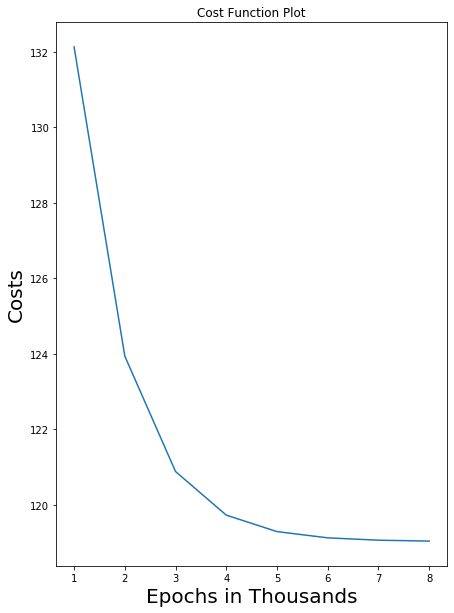

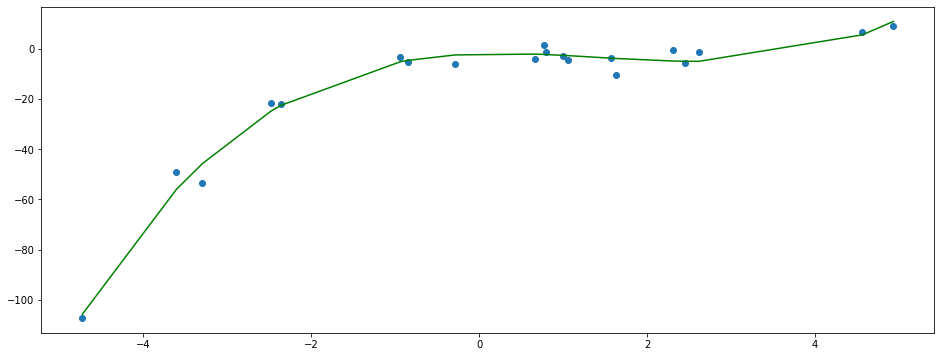

In [115]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

poly = Multi_Variate_Polynomial_Regression(X, y, degree_of_polynomial = 3)

poly.fit(learning_rate = 0.00005, epochs = 8000)

poly.plot_cost_function()

plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'])
plot_df = pd.DataFrame({'X' : X[:, 0], 'y' : np.dot(poly._weights, poly.X.T).T[:, 0]})
plot_df.sort_values(by = 'X', inplace = True, ignore_index = True)
plt.plot(plot_df['X'], plot_df['y'], 'g')

Epoch 1000	: MAE_Error is 7.002390082546588	| Costs	:711.8040787741522
Epoch 2000	: MAE_Error is 6.027005776884601	| Costs	:546.7665606511872
Epoch 3000	: MAE_Error is 5.206174816140221	| Costs	:429.7667048396188
Epoch 4000	: MAE_Error is 4.515347165853745	| Costs	:346.7641055621328
Epoch 5000	: MAE_Error is 3.985134626509293	| Costs	:287.82411140939075
Epoch 6000	: MAE_Error is 3.6416226045320856	| Costs	:245.91710527727068
Epoch 7000	: MAE_Error is 3.41415117713455	| Costs	:216.06893782834956
Epoch 8000	: MAE_Error is 3.3061446574632614	| Costs	:194.75981848443965
Epoch 9000	: MAE_Error is 3.2139102616207245	| Costs	:179.4990017506745
Epoch 10000	: MAE_Error is 3.1349611175122467	| Costs	:168.52385697896707
Epoch 11000	: MAE_Error is 3.0672049795534426	| Costs	:160.58694526058852
Epoch 12000	: MAE_Error is 3.00888155560137	| Costs	:154.80536551190355


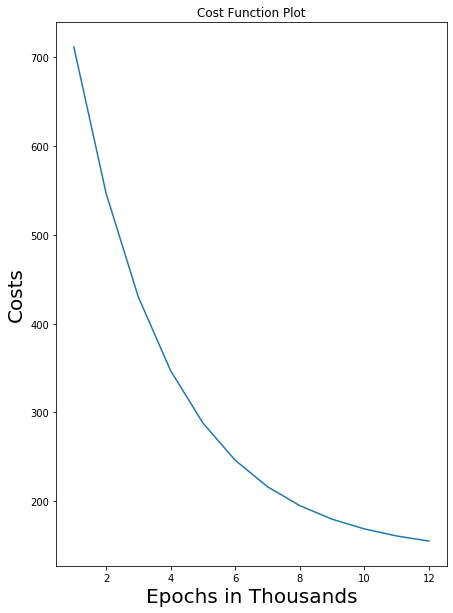

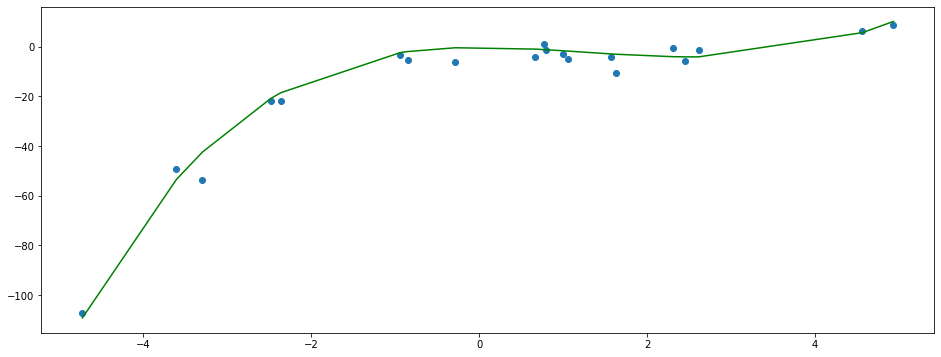

In [121]:
X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

poly = Multi_Variate_Polynomial_Regression(X, y, degree_of_polynomial = 4)

poly.fit(learning_rate = 0.000001, epochs = 12000)

poly.plot_cost_function()

plt.figure(figsize=(16, 6))
plt.scatter(df['X'], df['y'])
plot_df = pd.DataFrame({'X' : X[:, 0], 'y' : np.dot(poly._weights, poly.X.T).T[:, 0]})
plot_df.sort_values(by = 'X', inplace = True, ignore_index = True)
plt.plot(plot_df['X'], plot_df['y'], 'g')